In [1]:
print('Alberto Bermejo,  000444772')
print('Álvaro Tristante, 000439780')
print('MATH-F314')
print('Devoir 2. Advection-diffusion en milieu poreux.')

Alberto Bermejo,  000444772
Álvaro Tristante, 000439780
MATH-F314
Devoir 2. Advection-diffusion en milieu poreux.


In [2]:
import numpy
import sympy
from matplotlib import pyplot

In [3]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
sympy.init_printing()

In [4]:
print('QUESTION 1')

QUESTION 1


In [5]:
#Définition des nouvaux symboles
z_1, Ra_1, t_1, xi_1, f = sympy.symbols('z Ra t xi f ')
w1, c1, delta_1, i_1, alpha = sympy.symbols('w´ c´ ∆ i alpha')
w_1, c_1, c0, k_1, x_1, n_1 = sympy.symbols('w c c0 k x n')

In [6]:
#Définition des nouvaux variables
xi_2 = (z_1 * (sympy.sqrt(Ra_1 /(4 * t_1))))
xiprime_1 = xi_2.diff(z_1)
xiprime_2 = xiprime_1 ** 2
xiprime = sympy.Derivative(f, xi_1) * xiprime_1
xidoubleprime = sympy.Derivative(f, xi_1, xi_1) * xiprime_1 **2

In [7]:
#Définition des nouvaux variables
xidoubleprime_w = sympy.Derivative(w_1, xi_1, xi_1) * xiprime_1 **2
xidoubleprime_w1 = sympy.Derivative(w1, xi_1, xi_1) * xiprime_1 **2
xidoubleprime_c = sympy.Derivative(c_1, xi_1, xi_1) * xiprime_1 **2
xidoubleprime_c1 = sympy.Derivative(c1, xi_1, xi_1) * xiprime_1 **2
cprime1 = sympy.Derivative(c_1 , t_1)
cprime2 = sympy.Derivative(c_1 - c0, t_1)
cprime3 = sympy.Derivative(c1 , t_1)

In [8]:
#Définition des équations à gauche 
eq1 = (xidoubleprime_w - w_1 * k_1 ** 2 ) * sympy.exp(- i_1 * k_1 * x_1)
eq1_1 = (xidoubleprime_w1 - w1 * k_1 ** 2 )
eq1b = (xidoubleprime_w - w_1 * k_1 ** 2 ) 

In [9]:
#Définition des équations au milieu
eq2 = - k_1 ** 2 * (c_1 -c0) * sympy.exp(- i_1 * k_1 * x_1) * cprime2 - ((1 / (4 * t_1)) * sympy.Derivative((c_1 - c0), xi_1, xi_1) - (k_1 ** 2 / Ra_1) * (c_1 - c0)) * sympy.exp(- i_1 * k_1 * x_1)
eq2_1 = - k_1 ** 2 * c1 * cprime3 - ((1 / (4 * t_1)) * sympy.Derivative(c1, xi_1, xi_1) - (k_1 ** 2 / Ra_1) * c1)
eq2a = - k_1 ** 2 * (c_1 -c0) * cprime2 - ((1 / (4 * t_1)) * sympy.Derivative((c_1 - c0), xi_1, xi_1) - (k_1 ** 2 / Ra_1) * (c_1 - c0))
eq2b = - k_1 ** 2 * c_1 * cprime1 - (1 / t_1) * ((1 / 4) * sympy.Derivative(c_1, xi_1, xi_1) + (xi_1 / 2) * sympy.Derivative(c_1, xi_1) - k_1 ** 2 * t_1 * c_1 / Ra_1 )

In [10]:
#Définition des équations à droite
eq3 = - sympy.sqrt( Ra_1 / sympy.pi / t_1) * sympy.exp(- xi_1 ** 2) * w_1 * sympy.exp(- i_1 * k_1 * x_1)
eq3_1 = - sympy.sqrt( Ra_1 / sympy.pi / t_1) * sympy.exp(- xi_1 ** 2) * w1
eq3b = - sympy.sqrt( Ra_1 / sympy.pi / t_1) * sympy.exp(- xi_1 ** 2) * w_1 

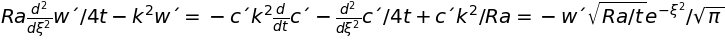

In [254]:
eqtot1 = sympy.Eq(sympy.Eq(eq1_1,eq2_1),eq3_1)
eqtot1

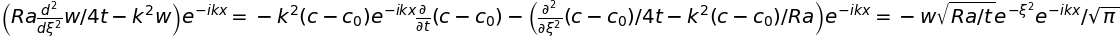

In [255]:
eqtot2 = sympy.Eq(sympy.Eq(eq1,eq2),eq3)
eqtot2

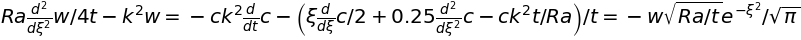

In [256]:
eqtot = sympy.Eq(sympy.Eq(eq1b, eq2b), eq3b)
eqtot

In [257]:
print('QUESTION 2')

QUESTION 2


In [13]:
#Définition des constants
L = 5
N = 101
delta = L / (N - 1)
t_0 = 0.00001
T = 0.0001
dt = 10 **(-8)
Ra = 500
k = 0.1
t = numpy.linspace(0.0, T, num=N)  # grille du temps

In [27]:
#Définition d'une fonction qui fait la somme des matrices et multiplication par une variable pour obtenir l'opérateur L à partir des différences finies
def L_operator(N, delta, Ra, k, t):
    M = numpy.diag((-2.0) * numpy.ones(N))
    U = numpy.diag(1.0 * numpy.ones(N - 1), k = 1)
    L = numpy.diag(1.0 * numpy.ones(N - 1), k = -1)
    A = M + U + L
    B = numpy.array(A)* Ra * 0.25 / (t * delta**2)
    K = -(k ** 2) * numpy.array(numpy.identity(N))
    C = B +  K
    return C

In [15]:
L_operator(100, delta_1, Ra_1, k_1, t_1)

array([[-0.5*Ra/(t*∆**2) - 1.0*k**2, 0.25*Ra/(t*∆**2), 0, ..., 0, 0, 0],
       [0.25*Ra/(t*∆**2), -0.5*Ra/(t*∆**2) - 1.0*k**2, 0.25*Ra/(t*∆**2),
        ..., 0, 0, 0],
       [0, 0.25*Ra/(t*∆**2), -0.5*Ra/(t*∆**2) - 1.0*k**2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., -0.5*Ra/(t*∆**2) - 1.0*k**2, 0.25*Ra/(t*∆**2), 0],
       [0, 0, 0, ..., 0.25*Ra/(t*∆**2), -0.5*Ra/(t*∆**2) - 1.0*k**2,
        0.25*Ra/(t*∆**2)],
       [0, 0, 0, ..., 0, 0.25*Ra/(t*∆**2), -0.5*Ra/(t*∆**2) - 1.0*k**2]],
      dtype=object)

In [25]:
#Définition de l'opérateur H1 qui va servir à construire l'opérateur M et H
def H1_operator(N,delta):
    M = numpy.diag((-2.0) * numpy.ones(N))
    U = numpy.diag(1.0 * numpy.ones(N - 1), k = 1)
    L = numpy.diag(1.0 * numpy.ones(N - 1), k = -1)
    A = M + U + L
    B = numpy.array(A) * 0.25 / (delta**2)
    return B

In [26]:
H1_operator(100, 0.05)

array([[-200.,  100.,    0., ...,    0.,    0.,    0.],
       [ 100., -200.,  100., ...,    0.,    0.,    0.],
       [   0.,  100., -200., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ..., -200.,  100.,    0.],
       [   0.,    0.,    0., ...,  100., -200.,  100.],
       [   0.,    0.,    0., ...,    0.,  100., -200.]])

In [23]:
#Définition de l'opérateur H2 qui va servir à construire l'opérateur M et H
def H2_operator(N, delta):
    U = numpy.diag(1.0 * numpy.ones(N - 1), k = 1)
    L = numpy.diag(-1.0 * numpy.ones(N - 1), k = -1)
    A = U + L
    for m in range (N-1):
        A[m] = A[m] * ( 0.25 * (m+1) )
    return A

In [24]:
H2_operator(100, 0.05)

array([[  0.  ,   0.25,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ -0.5 ,   0.  ,   0.5 , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,  -0.75,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  24.5 ,   0.  ],
       [  0.  ,   0.  ,   0.  , ..., -24.75,   0.  ,  24.75],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,  -1.  ,   0.  ]])

In [21]:
#Définition de l'opérateur M à partir des opérateur H1 et H2
def M_operator(N, delta, Ra, k, t):
    A = H1_operator(N, delta) + H2_operator(N, delta)
    K = -(((k_1 ** 2)* t_1)/ Ra_1) * numpy.array(numpy.identity(N))
    B = A + K
    C = (1 / t_1) * numpy.array(B)
    return C

In [22]:
M_operator(100, delta_1, Ra_1, k_1, t_1 )

NameError: name 'H2_operator' is not defined

In [267]:
print('QUESTION 3')

QUESTION 3


In [271]:
#Solutions à l'équation de Hermite
def herm1(x, l):
    a = ((-1) ** l) * sympy.exp(x ** 2) * sympy.exp(- x ** 2).diff(x, l)
    return a

In [269]:
#Définition de la fonction fn
def fn(x, n):
    b = herm1(x, n) * sympy.exp(- x ** 2)
    return b

In [270]:
#Partie à gauche de l'équation aux valeurs propre 
def lh(x,n):
    c = 1 / 4 * fn(x, n).diff(x, 2) + 1 / 2 * xi_1 * fn(x, n).diff(x, 1)
    d = sympy.simplify(c) 
    return d

In [272]:
#Partie à droite de l'équation aux valeurs propres 
def rh(x, n):
    a = alpha * fn(x,n)
    return a   

In [196]:
#Fonction qui donne les valeurs de alpha en fonction de n
def eqvalidsolver(x, n):
    if sympy.limit(fn(x, n), xi_1, 0) == 0 and sympy.limit(fn(x, n), xi_1, numpy.inf) == 0:
        equation = rh(x, n) - lh(x, n)
        eqsolve = sympy.solve(equation, alpha)
        return eqsolve
    else:
        a = 'Valeur non admissible'
        return a

In [197]:
alpha_final = eqvalidsolver(x = xi_1, n = 9)
alpha_final

In [238]:
print('QUESTION 4')

QUESTION 4


In [273]:
#Définition de l'opérateur H à partir de H1 et H2
def H_operator(N, delta):
    A = H1_operator(N, delta) + H2_operator(N, delta)
    return A

In [274]:
H_operator(100, 0.05)

array([[-200.  ,  100.25,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [  99.5 , -200.  ,  100.5 , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,   99.25, -200.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ..., -200.  ,  124.5 ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,   75.25, -200.  ,  124.75],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,   99.  , -200.  ]])

In [275]:
#Valeurs propres de l'opérateur H
vp = numpy.linalg.eig(H_operator(100, 0.05))[0]
vp

array([-399.        , -397.99999981, -396.99998282, -395.99940587,
       -394.9910796 , -393.93732411, -392.76299064, -386.20339017,
       -391.41109857, -388.12867341, -389.86588814, -384.09362131,
       -379.33274978, -381.80246512, -373.86856951, -370.87965543,
       -367.72338603, -364.40281775, -357.28174388, -360.92115249,
       -353.48809971, -376.68720499, -349.54388189, -345.45290483,
       -341.21913265, -336.84667577, -327.70285656, -332.33978687,
       -322.94040878, -318.05709597, -313.05769411, -307.94709761,
       -302.73031416, -297.41245936, -291.99875143, -286.49450566,
         -1.        , -280.905129  , -275.23611436, -269.49303504,
       -263.681539  ,   -2.00000019,   -3.00001718, -257.80734308,
         -4.00059413,   -5.0089204 , -251.87622721,   -6.06267589,
         -7.23700936,   -8.58890143,  -10.13411186, -245.89402853,
        -11.87132659, -239.8666355 ,  -13.79660983,  -15.90637869,
        -18.19753488, -233.79998194,  -20.66725022,  -26.13143

In [276]:
#Calcul numérique des 5 plus grandes valeurs propres de l'opérateur
n = 5
vp[numpy.argsort(vp)[-n:]]

array([-5.0089204 , -4.00059413, -3.00001718, -2.00000019, -1.        ])

In [277]:
print('QUESTION 5')

QUESTION 5


In [32]:
# Le "pas" de la methode Runge-Kutta qu'on appliquera recursivement
def rk4_step(y, f, h, *args):
    t = N*h
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [33]:
#Les valeurs initiales
c_i = numpy.load("init_cond_c (1).npy")
c_i

array([ 0.32322026,  0.57278405,  0.40414506,  0.31732477,  0.1354822 ,
        0.46884117,  0.15638082,  0.8376595 ,  0.94549414,  0.07516228,
        0.68758756,  0.29334238,  0.35206684,  0.88839496, -0.39344591,
       -0.36930605, -0.4696724 ,  0.74892977,  0.66723513,  0.80501822,
        0.96792751,  0.69873785,  0.19221904,  0.67079376, -0.32258836,
        0.45988153, -0.28497007,  0.91700338,  0.28277248,  0.12199291,
       -0.10316658,  0.66135053,  0.1842255 ,  0.35265092, -0.4718153 ,
        0.42645325,  0.41814358,  0.425401  ,  0.91562212,  0.52273045,
        0.03926185,  0.15554793,  0.54644679, -0.40966179,  0.50015007,
        0.5059568 , -0.18442616, -0.30661055, -0.02685747,  0.04556616,
        0.35529516,  0.15790227,  0.98256076, -0.34693278, -0.18668487,
       -0.25803572,  0.47966249, -0.1200626 ,  0.19946616, -0.13336161,
       -0.26154562, -0.33443729,  0.48449438, -0.29272557, -0.20512646,
        0.05308776,  0.73148984, -0.35434809,  0.75691736, -0.35

In [35]:
#Cette fonction est restée à moitié faite.

u_rk4 = numpy.zeros((99, 99))

for i in range(99):
    u_rk4[0][i] = c_i[i]

#L'integration sur le temps. Nous resolvons l'eq. c' = f(xi, t), où f est la combinaison 
#de l'operateur M et l'inverse de L suivante:
def timeint(N):
    t = t_0
    xi = 0
    for n in range(N - 1):
        for j in range(N - 1):
            rhs = M_operator(99, 10**(-8), 500, 0.1, t)[n][j] - (500/(t*numpy.pi)) * numpy.exp(-xi**2) * numpy.linalg.inv(L_operator(99,10**(-8), 500, 0.1, t))[n][j]
            u_rk4[n+1][j] = rk4_step(u_rk4[n][j], rhs, 10**(-8))
    return u_rk4
    

In [282]:
mask1 = numpy.where(numpy.logical_and(xi_4>= 0.05, xi_4 <= 4.95))
print(mask1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)


In [283]:
mask2 = numpy.where(numpy.logical_and(xi_4>= 0.0, xi_4 <= 4.95))
mask2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int64),)

In [284]:
xi_4[mask1]

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
       2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
       3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
       3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
       4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95])

In [285]:
u0[mask1] = c_i
print(u0)

[ 1.          0.32322026  0.57278405  0.40414506  0.31732477  0.1354822
  0.46884117  0.15638082  0.8376595   0.94549414  0.07516228  0.68758756
  0.29334238  0.35206684  0.88839496 -0.39344591 -0.36930605 -0.4696724
  0.74892977  0.66723513  0.80501822  0.96792751  0.69873785  0.19221904
  0.67079376 -0.32258836  0.45988153 -0.28497007  0.91700338  0.28277248
  0.12199291 -0.10316658  0.66135053  0.1842255   0.35265092 -0.4718153
  0.42645325  0.41814358  0.425401    0.91562212  0.52273045  0.03926185
  0.15554793  0.54644679 -0.40966179  0.50015007  0.5059568  -0.18442616
 -0.30661055 -0.02685747  0.04556616  0.35529516  0.15790227  0.98256076
 -0.34693278 -0.18668487 -0.25803572  0.47966249 -0.1200626   0.19946616
 -0.13336161 -0.26154562 -0.33443729  0.48449438 -0.29272557 -0.20512646
  0.05308776  0.73148984 -0.35434809  0.75691736 -0.35585239  0.9646892
  0.2029768   0.96514163  0.40726828  0.60889537 -0.44121831 -0.07578956
 -0.31970516 -0.0557897  -0.32190842 -0.02302523  0.121

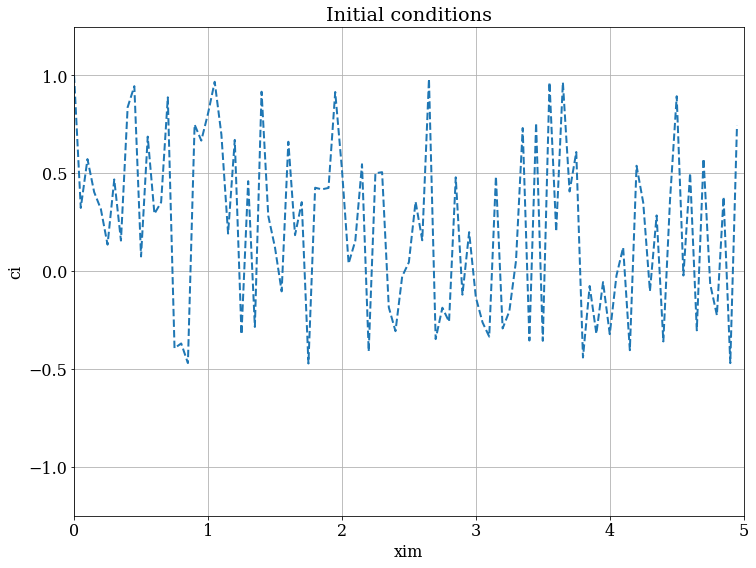

In [286]:
#Graphique des conditions initiales
pyplot.figure(figsize=(12.0, 9.0))
pyplot.title('Initial conditions')
pyplot.xlabel('xim')
pyplot.ylabel('ci')
pyplot.grid()
pyplot.plot(xi_4[mask2], u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(-1.25, 1.25);